In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as ppt
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Probit
from statsmodels.discrete.discrete_model import Logit
from linearmodels import OLS

from stargazer.stargazer import Stargazer
import evaluation_functions
from tqdm import tqdm

# Treatment independent of covariates

## Create data

In [2]:
a_true = 10.
b1_true = 2.
b2_true = 0.
tau_true = 10.
sigma = 1.

In [3]:
# Create data
df_data = pd.DataFrame(index=range(1000))
df_data['x1'] = np.random.uniform(0, 10, df_data.shape[0])
df_data['x2'] = np.random.uniform(0, 10, df_data.shape[0]) # not important
df_data['w'] = np.random.choice([0,1], df_data.shape[0])
df_data['eps'] = np.random.normal(0, sigma, df_data.shape[0])
df_data['y'] = a_true + tau_true*df_data['w'] + b1_true*df_data['x1'] + b2_true*df_data['x2'] + df_data['eps']
df_data.head()

,x1,x2,w,eps,y
0,6.562850,5.858894,0,-0.268386,22.857315
1,5.722447,5.002097,1,-0.551508,30.893386
2,8.880598,7.857356,0,-0.787702,26.973495
3,3.797264,4.913460,0,-0.235991,17.358537
4,8.347151,5.642156,0,-0.948044,25.746259


## Estimate model

In [4]:
exog = df_data[['w','x1','x2']]
exog = sm.add_constant(exog)
endog = df_data['y']
mod = OLS(endog, exog) #, entity_effects=True,time_effects=True)
res = mod.fit() #cov_type='clustered', cluster_entity=True)
a_est = res.params[0]
b1_est = res.params[1]
b2_est = res.params[2]
print(res)

                            OLS Estimation Summary                            
Dep. Variable:                      y   R-squared:                      0.9847
Estimator:                        OLS   Adj. R-squared:                 0.9846
No. Observations:                1000   F-statistic:                 6.392e+04
Date:                Wed, Aug 16 2023   P-value (F-stat)                0.0000
Time:                        16:20:21   Distribution:                  chi2(3)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          9.9793     0.0833     119.74     0.0000      9.8160      10.143
w              9.9014     0.0614     161.25     0.00

# Treatment dependent on covariates

## Create data

In [5]:
# Create data
df_data = pd.DataFrame(index=range(1000))
df_data['x1'] = np.random.uniform(0, 10, df_data.shape[0])
df_data['x2'] = np.random.uniform(0, 10, df_data.shape[0]) # not important
df_data['w'] = np.nan
for ind in tqdm(df_data.index):
    prob_w = df_data['x1'].loc[ind]/df_data['x1'].max() # if x1 is small, probability of treatment is low
    df_data['w'].loc[ind] = np.random.choice([0,1],p=[1.-prob_w,prob_w])
df_data['eps'] = np.random.normal(0, sigma, df_data.shape[0])
df_data['y'] = a_true + tau_true*df_data['w'] + b1_true*df_data['x1'] + b2_true*df_data['x2'] + df_data['eps']
df_data.head()

100%|██████████| 1000/1000 [00:00<00:00, 1915.13it/s]


,x1,x2,w,eps,y
0,7.044239,1.283057,0.0,-0.806114,23.282363
1,8.089057,9.505502,1.0,1.726744,37.904857
2,2.470742,9.674889,0.0,0.598968,15.540452
3,0.200621,2.329253,0.0,1.369771,11.771012
4,3.684132,8.770907,1.0,0.641086,28.009351


In [6]:
df_data[['w','x1']].corr()

,w,x1
w,1.000000,0.555483
x1,0.555483,1.000000


## Estimate naive model

In [7]:
exog = df_data[['w']]
exog = sm.add_constant(exog)
endog = df_data['y']
mod = OLS(endog, exog) #, entity_effects=True,time_effects=True)
res = mod.fit() #cov_type='clustered', cluster_entity=True)
a_est = res.params[0]
w_est = res.params[1]
print(res)

                            OLS Estimation Summary                            
Dep. Variable:                      y   R-squared:                      0.7382
Estimator:                        OLS   Adj. R-squared:                 0.7380
No. Observations:                1000   F-statistic:                    2818.4
Date:                Wed, Aug 16 2023   P-value (F-stat)                0.0000
Time:                        16:20:24   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          16.749     0.2148     77.989     0.0000      16.328      17.169
w              16.407     0.3090     53.088     0.00

## Include relevant covariates

In [8]:
exog = df_data[['w','x1','x2']]
exog = sm.add_constant(exog)
endog = df_data['y']
mod = OLS(endog, exog) #, entity_effects=True,time_effects=True)
res = mod.fit() #cov_type='clustered', cluster_entity=True)
a_est = res.params[0]
b1_est = res.params[1]
b2_est = res.params[2]
print(res)

                            OLS Estimation Summary                            
Dep. Variable:                      y   R-squared:                      0.9885
Estimator:                        OLS   Adj. R-squared:                 0.9885
No. Observations:                1000   F-statistic:                 8.503e+04
Date:                Wed, Aug 16 2023   P-value (F-stat)                0.0000
Time:                        16:20:27   Distribution:                  chi2(3)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          9.9134     0.0856     115.78     0.0000      9.7456      10.081
w              10.025     0.0783     128.10     0.00

## Large sample

### Create sample

In [10]:
def create_data(a_true,tau_true,b1_true,b2_true):
    df_data = pd.DataFrame(index=range(1000))
    df_data['x1'] = np.random.uniform(0, 10, df_data.shape[0])
    df_data['x2'] = np.random.uniform(0, 10, df_data.shape[0]) # not important
    df_data['w'] = np.nan
    for ind in (df_data.index):
        prob_w = df_data['x1'].loc[ind]/df_data['x1'].max() # if x1 is small, probability of treatment is low
        df_data['w'].loc[ind] = np.random.choice([0,1],p=[1.-prob_w,prob_w])
    df_data['eps'] = np.random.normal(0, sigma, df_data.shape[0])
    df_data['y'] = a_true + tau_true*df_data['w'] + b1_true*df_data['x1'] + b2_true*df_data['x2'] + df_data['eps']
    return df_data

In [11]:
# Run large number of estimations
for i in tqdm(range(100)):
    # Naive model
    df_data = create_data(a_true,tau_true,b1_true,b2_true)
    exog = df_data[['w']]
    exog = sm.add_constant(exog)
    endog = df_data['y']
    mod = OLS(endog, exog) #, entity_effects=True,time_effects=True)
    res = mod.fit() #cov_type='clustered', cluster_entity=True)
    df_param_i = pd.DataFrame(data=[res.params])
    df_conflow_i = res.conf_int(0.95)[['lower']].transpose()
    df_confhigh_i = res.conf_int(0.95)[['upper']].transpose()
    if i == 0:
        df_param_naive = df_param_i.copy()
        df_conflow_naive = df_conflow_i.copy()
        df_confhigh_naive = df_confhigh_i.copy()
    else:
        df_param_naive = df_param_naive.append(df_param_i)
        df_conflow_naive = df_conflow_naive.append(df_conflow_i)
        df_confhigh_naive = df_confhigh_naive.append(df_confhigh_i)
    # Full model
    exog = df_data[['w','x1','x2']]
    exog = sm.add_constant(exog)
    endog = df_data['y']
    mod = OLS(endog, exog) #, entity_effects=True,time_effects=True)
    res = mod.fit() #cov_type='clustered', cluster_entity=True)
    df_param_i = pd.DataFrame(data=[res.params])
    df_conflow_i = res.conf_int(0.95)[['lower']].transpose()
    df_confhigh_i = res.conf_int(0.95)[['upper']].transpose()
    if i == 0:
        df_param_full = df_param_i.copy()
        df_conflow_full = df_conflow_i.copy()
        df_confhigh_full = df_confhigh_i.copy()
    else:
        df_param_full = df_param_full.append(df_param_i)
        df_conflow_full = df_conflow_full.append(df_conflow_i)
        df_confhigh_full = df_confhigh_full.append(df_confhigh_i)

100%|██████████| 100/100 [00:42<00:00,  2.33it/s]


### Visualize difference in estimates for naive and full model

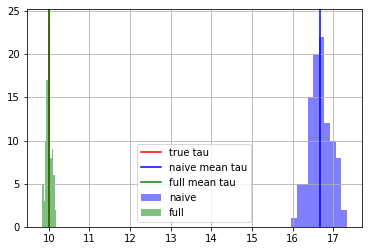

In [12]:
df_param_naive['w'].hist(color='blue',alpha=0.5,label='naive')
df_param_full['w'].hist(color='green',alpha=0.5,label='full')
ppt.axvline(tau_true,color='red',label='true tau')
ppt.axvline(df_param_naive['w'].mean(),color='blue',label='naive mean tau')
ppt.axvline(df_param_full['w'].mean(),color='green',label='full mean tau')
ppt.legend()

Treatment is more likely if x1 is large. Therefore, the naive model over-estimates the treatment effect if x1 is ommitted.

## Solve with matching

This follows roughly Imbens (2014) - Mathcing Methods in Practice.

### Step 1: Assess overlap

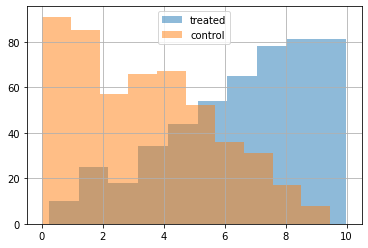

In [9]:
df_data.loc[df_data['w'] == 1]['x1'].hist(label='treated',alpha=0.5)
df_data.loc[df_data['w'] == 0]['x1'].hist(label='control',alpha=0.5)
ppt.legend()

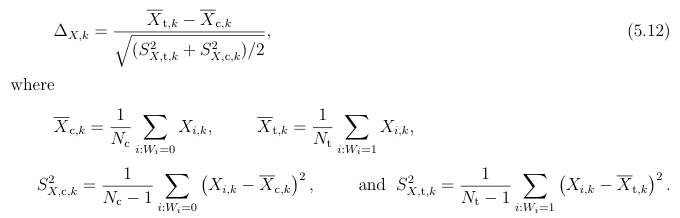

In [10]:
N_c = (1 - df_data['w']).sum()
N_t = (df_data['w']).sum()

In [11]:
x_ck = 1/N_c*(df_data.loc[df_data['w'] == 0]['x1'].sum())
x_tk = 1/N_t*(df_data.loc[df_data['w'] == 1]['x1'].sum())

In [12]:
S2_Xck = 1/(N_c-1)*(((df_data.loc[df_data['w'] == 0]['x1'] - x_ck)**2).sum())
S2_Xtk = 1/(N_t-1)*(((df_data.loc[df_data['w'] == 1]['x1'] - x_tk)**2).sum())

In [13]:
delta_Xk = (x_tk - x_ck)/np.sqrt((S2_Xtk + S2_Xck)/2)
delta_Xk

1.3345532444619126

In [14]:
t_Xk = (x_tk - x_ck)/(np.sqrt((S2_Xtk)/N_t) + (S2_Xck/N_c))
t_Xk

26.4775155710109

### Step 2: Estimate propensity score

#### Lasso

In [15]:
# which covariates to include
formula = 'w ~ x1 + x2'
lasso = Logit.from_formula(formula, df_data).fit_regularized(method='l1', alpha=1.0, L1_wt=1.0, start_params=None, profile_scale=False, refit=False)
print(lasso.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5230550482468894
            Iterations: 22
            Function evaluations: 23
            Gradient evaluations: 22
                           Logit Regression Results                           
Dep. Variable:                      w   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Wed, 16 Aug 2023   Pseudo R-squ.:                  0.2494
Time:                        16:20:38   Log-Likelihood:                -520.15
converged:                       True   LL-Null:                       -692.95
Covariance Type:            nonrobust   LLR p-value:                 9.012e-76
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------


#### Imbens and Rubin (2014), as described in Imbens (2014) on page 20

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [17]:
df_data['x1x2'] = df_data['x1']*df_data['x2']
cols = ['x1','x2','x1x2']

In [18]:
C_lin = 1
C_qua = 2.71

In [19]:
X_B = [1]
K_B = len(X_B)
K = 2 # x1 and x2

In [20]:
# Step 1: Estimate logistic regresion model, with basic covs X_B
df_data['const'] = 1
step1 = Logit(endog=df_data['w'],exog=df_data['const'],offset=False)
step1_res = step1.fit()
print(step1_res.summary())

Optimization terminated successfully.
         Current function value: 0.692947
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:                      w   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      999
Method:                           MLE   Df Model:                            0
Date:                Wed, 16 Aug 2023   Pseudo R-squ.:               5.131e-12
Time:                        16:20:43   Log-Likelihood:                -692.95
converged:                       True   LL-Null:                       -692.95
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0400      0.063     -0.632      0.527      -0.164       0.084


In [26]:
import statsmodels.api as sm

# Fit two logistic regression models
model1 = sm.Logit(df_data['w'], df_data['x1']).fit()
model2 = sm.Logit(df_data['w'], df_data['x2']).fit()

# Compare the two models using the log-likelihood ratio test
results = model2.compare_lr_test(model1)

print(f"p-value = {results[1]}")

Optimization terminated successfully.
         Current function value: 0.658442
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.693012
         Iterations 3


AttributeError: 'LogitResults' object has no attribute 'compare_lr_test'

In [23]:
step2_res.compare_lr_test(step1_res)
#results = model2.compare_lr_test(model1)

AttributeError: 'LogitResults' object has no attribute 'compare_lr_test'

In [22]:
# Estimate K+1-K_B additional logistic regression models where each model includes a single additional element
# Compute: likelihood-ratio test assesses the goodness of fit of two competing statistical models, specifically one found by maximization 
# over the entire parameter space and another found after imposing some constraint, based on the ratio of their likelihoods
for col in cols[:1]:
    print(col)
    step2 = Logit(endog=df_data['w'],exog=df_data[['const'] + [col]],offset=False)
    step2_res = step2.fit()
    print(step2_res.summary())

x1
Optimization terminated successfully.
         Current function value: 0.520225
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      w   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      998
Method:                           MLE   Df Model:                            1
Date:                Wed, 16 Aug 2023   Pseudo R-squ.:                  0.2493
Time:                        16:20:49   Log-Likelihood:                -520.23
converged:                       True   LL-Null:                       -692.95
Covariance Type:            nonrobust   LLR p-value:                 4.162e-77
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5067      0.177    -14.124      0.000      -2.855      -2.159
x1             0.4964     

In [312]:
step1_res.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

#### Estimate propensity score

In [315]:
# treatment selection model
formula = 'w ~ x1'
res_probit = Logit.from_formula(formula, df_data).fit()
df_data['propensity_score'] = res_probit.predict()

Optimization terminated successfully.
         Current function value: 0.491716
         Iterations 6


In [316]:
res_probit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      w   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      998
Method:                           MLE   Df Model:                            1
Date:                Wed, 16 Aug 2023   Pseudo R-squ.:                  0.2905
Time:                        15:58:22   Log-Likelihood:                -491.72
converged:                       True   LL-Null:                       -693.02
Covariance Type:            nonrobust   LLR p-value:                 1.491e-89
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5956      0.174    -14.877      0.000      -2.938      -2.254
x1             0.5228      0.032     16.410      0.000       0.460       0.585
==============================================================================
"""

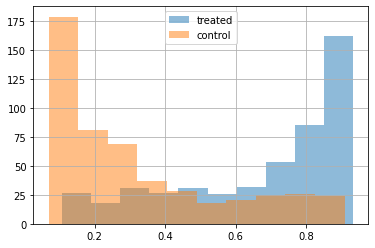

In [294]:
df_data['propensity_score'].loc[df_data['w'] == 1].hist(alpha=0.5,label='treated')
df_data['propensity_score'].loc[df_data['w'] == 0].hist(alpha=0.5,label='control')
ppt.legend()

In [295]:
df_data.groupby('w')['propensity_score'].mean()

w
0.0    0.316973
1.0    0.672719
Name: propensity_score, dtype: float64

In [ ]:


# outcome model
formula_outcome = 'bweight ~ prenatal1_ + mmarried_ + mage + fbaby_'
mod = OLS.from_formula(formula_outcome, dta_cat)

# treatment indicator variable
tind = np.asarray(dta_cat['mbsmoke_'])

teff = TreatmentEffect(mod, tind, results_select=res_probit)